<a href="https://colab.research.google.com/github/sumedhekaru/Coursera_Capstone/blob/master/Battle_of_Neighborhood_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Battle of Neighborhood
Finding the best neigborhood to live in a far away city using data science. 

## Contents
### 1. Introduction - Five Ws
&emsp; 1.1 What is the problem? <br>
&emsp; 1.2 Where is this? <br>
&emsp; 1.3 When is this applicable? <br>
&emsp; 1.4 Why do we do this? <br>
&emsp; 1.5 Who cares? <br>

### 2. Data
&emsp; 2.1 Load the required libraries. <br>
&emsp; 2.2 Get the neighborhood names <br>
&emsp; 2.3 Obtain the latitude, longitude, address, and miles to work for each neighborhood <br>
&emsp; 2.4 Obtain venues around each neighborhood <br>
&emsp; 2.5 Analyze Each Neighborhood to find how many unique catogories are belongs to each neighborhood <br>

### 3. Methodology - K-means Clustering
&emsp; 3.1 Choosing the best cluster number using elbow method <br>
&emsp; 3.2 Reanalize data with best K <br>
&emsp; 3.3 Creating an interactive map to show the neigborhoods and their cluster numbers <br>

### 4. Results
&emsp; 4.1 Average cluster results <br>
&emsp; 4.2 Graphical representation of best Neighborhoods <br>

### 5. Discussion

### 6. Conclusion

### 7. Acknowladgement

### 8. References

## 1. Introduction - Five Ws
### &emsp; 1.1 What is the problem?
I work in downtown Memphis, TN. In general, I live 30 mins away from work, when there is no traffic. However, since I am commuting when most of the people are commuting to there work, there is almost always traffic on the roads. So it is easily 45-60 mins one-way trip. Being optimistic, considering one-way is 45 mins, it is 90 mins for a round trip. For a week with 5 workdays,  it is 7.5 hours, for a month it is 30 hours, for a year it is 16 days. So for a given year, I am wasting full 16 days counting days and nights riding my car wasting my time.

I am planning to move St. Louis, Missouri for a new job offer. While I have a friend already living there, I would like to do my analysis and find out where I can move. But driving time is something I strongly want to reduce. 

**So the problem is, where I should move to save some time from driving but still have good amenities such as restaurants, cafes, parks, shopping, etc within reachable distance.** 

Also, one of the jobs I was being interviewed is in St. Louis, Illinois. I want to do a similar analyze there to find out if I can find a good neigbhorhood to live.

### &emsp; 1.2 Where is this?
It is St. Louis, Missouri, where birds sing and elephants bath, just kidding. But it sure looks like a fantastic place to live. There are tons of things to do around there. The population was roughly 300 k and rising. The job market seams great too.

### &emsp; 1.3 When is this applicable?
I know this is a changing world! The time will change everything. The time of this analysis is August 2019. So don't blame me if you decided to move based on this data analysis in 2050. But the good thing is, I developed the program to pull the latest data. So if you re-run the program in 2050, you should be (may be...) fine? 

### &emsp; 1.4 Why do we do this?
It is to primarily to save time when I move. I am currently spending so much time on the road, 16 full days per year! just to commute.  People say time is money. So it is to save me some money. I am sure if you are in the same boat, following this, you might able to save some money with this. Who doesn't like saving money for next cruise trip? Wait, is someone paying me when I save my own time? Ney.. I will use this saved time to play with my daughters. Not everything is money. I think I have bipolar disorder.

### &emsp; 1.5 Who cares?
Do you even here me? It is to save money (really the time) while finding the best neighborhood to live. If you are someone who cares about saving money (time), you should read. If you have plenty of those lying around that you don't know what to do, this is not for you. You should spend some money buying a boat and traveling the world instead of reading this. 


## 2. Data
We need data to do our analysis. This section will gather all the required data and do the clean-up job so that the data are usable. I am hoping to gather neighborhood names from Wikipedia (use web scraping with BeautifulSoup package) and use FourSquare to obtain point of interest around the selected neighborhoods.

1.  St. Louis Neighborhoods - The names of the St. Louis neighborhoods will be obtained from the Wikipedia page
https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis. This page has neighborhoods of the St. Louis along with some demographic data. This will be great for met to get started. All I really need is the names of the neighborhoos so that I can find the address, latitude, longitude, nearby point of interest details using FourSquare module.

2. As mentioned before, I am going to use FourSquare to obtain point of interest data.


### 2.1 Load the required libraries.
I will start by importing some libraries. These libraries are not necessary to use in this section. But to keep it clean, I always like to have all my libraries are loaded at the top of the program. That way I know which modules I have used in this project.

In [0]:
# Install beautiul soup 4 (If not already installed!)
# This package will be used for web scraping.
try:
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is ready for your service!')
except:
    !conda install -c anaconda beautifulsoup4 -y
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is installed and ready for your service!')

Beautiful Soup is ready for your service!


In [0]:
# Install module to convert an address into latitude and longitude values
try:
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('GeoCorder is ready for your service!')
except:
    !conda install -c conda-forge geopy --yes 
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('Geocorder is installed and ready for your service!')
    

GeoCorder is ready for your service!


In [0]:
# Install Folium - the map rendering library
try:
    import folium
    print('Folium is ready for your service!')
except:
    !conda install -c conda-forge folium=0.5.0
    import folium
    print('Foalium is installed and ready for your service!')

Folium is ready for your service!


In [0]:
# import other libraries
import pandas as pd
import requests as rs # to downolad web data
import numpy as np 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans


### 2.2 Get the neighborhood names
We are going to analyze naighborhoods of St. Louis, Missouri. There could be multiple sources that I could get this information about St. Louis, but I decided to go with [this](https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis) Wikipedia page. I am going to use Beautiful Soup to scrape the data out from this page. That way, if the neighborhood list is updated in the future, I can still run the scripts to find the latest data.

Let's start by downloading the web page data using request and then use BeautifulSoup to create a 'soup'.

In [0]:
# Following wikipedia page has all the neighborhood data. Let's use Beautiful Soup to get the required data.
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis'
source = rs.get(url)
soup = bs(source.content,'lxml')
 # print(soup.prettify())

I found that the required data is in the body section of the webpage. There is a table of content at the top of the webpage that I can obtain the names of different burrows. Table of content can be scraped using 'toctext' inside a 'span' section.

In [0]:
contents = soup.body.findAll('table')

#print(contents)

# Variables to store data
column_titles = []

table_data = []
# Table data
for trtag in contents[1].findAll('tr'):
    #print(trtag)
    #print(trtag.text)
    #column_titles.append(trtag.text.strip())'
    #print('zzz')
    data_row = trtag.text.strip()
    data_row = data_row.split('\n')
    #data_row = data_row.replace("\n",",")
    #print(data_row)
    table_data.append(data_row)

# First line is column titles
column_titles = table_data[0]
del(table_data[0]) # Remove firt line from the table data

#print(column_titles)
#print(table_data)

st_louis_df = pd.DataFrame(table_data, columns = column_titles)
# pd.DataFrame(neighborhood, columns=['Burrow','Neighborhood'])

print(st_louis_df.shape)
st_louis_df.head()


(79, 9)


,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,"3,006",16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,"7,268",6.3,91.8,0.5,0.1,0,1.3,North
2,Benton Park,"3,532",68.2,25.1,3.2,0.3,1.2,3.8,South
3,Benton Park West,"4,404",28.0,59.6,10.5,0,1.9,5.1,South
4,Bevo Mill,"12,654",74.2,13.8,7.5,0.4,4.6,3.9,South


In [0]:
# Covert the numbers to numbers
print("Before...")
print(st_louis_df.dtypes)
st_louis_df.Population = st_louis_df.Population.str.replace(',', '')
st_louis_df.Population = pd.to_numeric(st_louis_df.Population)
st_louis_df.White = pd.to_numeric(st_louis_df.White)
st_louis_df.Black = pd.to_numeric(st_louis_df.Black)
st_louis_df["Hispanic/Latino2"] = pd.to_numeric(st_louis_df["Hispanic/Latino2"])
st_louis_df.AIAN1 = pd.to_numeric(st_louis_df.AIAN1)
st_louis_df.Asian = pd.to_numeric(st_louis_df.Asian)
st_louis_df["Mixed Race"] = pd.to_numeric(st_louis_df["Mixed Race"])

print("\n Now...")
print(st_louis_df.dtypes)

Before...
Neighborhood        object
Population          object
White               object
Black               object
Hispanic/Latino2    object
AIAN1               object
Asian               object
Mixed Race          object
Corridor            object
dtype: object

 Now...
Neighborhood         object
Population            int64
White               float64
Black               float64
Hispanic/Latino2    float64
AIAN1               float64
Asian               float64
Mixed Race          float64
Corridor             object
dtype: object


The neighborhood data are in a 'ul' section inside the body continents of the webpage. I used findAll with 'ul' tag to obtain the related lines and followed the same techniques with 'li' tag to find all the raws of the table.

In [0]:
# Which region is popular for different ethnic groups?
st_louis_mean_demogra = st_louis_df.groupby('Corridor').mean()
st_louis_mean_demogra.drop("Population", axis = 1, inplace = True)
st_louis_mean_demogra

,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race
Corridor,,,,,,
Central,51.820000,40.145000,2.645000,0.210000,4.640000,2.500000
North,7.148387,88.912903,2.306452,0.239355,0.435484,1.470968
South,64.967857,27.175000,4.625000,0.292857,2.389286,3.403571


It looks like most white popole live in South side has more white people, north side is dominated by black people, Asian tends to go in the Central reagin. Let's try to see this graphically.

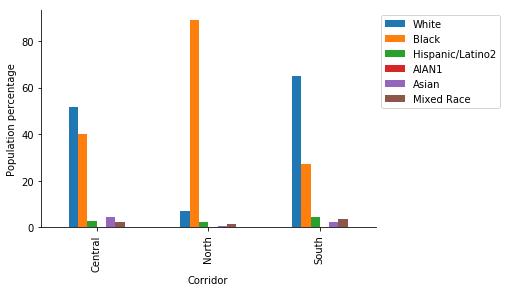

In [0]:
ax = st_louis_mean_demogra.plot.bar()
ax.set_ylabel('Population percentage')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 2.3 Obtain the latitude, longitude, address, and miles to work for each neighborhood

First, I like to create a function to obtain the following additional information for each neighborhood.
1. Latitude
1. Longitude
1. Address
1. Distance to the workplace.
 
This function expects 5 inputs, a pandas data frame with a column named 'Neighborhood', city, state, workplace latitude, and workplace longitude. It will return the same pandas data frame with above four additional columns.

In [0]:
def find_lat_lon_dist(df,town,state,lat0,lon0):
# This is function to add additional location information to the data frame df.
#
# Input:
#     df - input dataframe (must have a column named "Neighborhood")
#     town, state - Town and the state of the neighborhoods
#     lat0, lon0 - latitude and longitude of the work place where I commute everyday
#
# output: data frame df with additional 4 columns containing Latitude, Longitude, 
#         Address of the neighborhoods and miles_to_work.


  # Create Nominatim object to obtain the address info
  geolocator = Nominatim(user_agent="sum's_agent", format_string="%s " + town + ', ' + state )

  # Temporary variable to save data
  Lat = []
  Lon =[]
  address = []
  distance_to_work = []
  
  # Looping trough every line of the dataframe
  for i in range(df.shape[0]):
      try:
        # Get the data using the geocode
        location = geolocator.geocode(df['Neighborhood'][i])
        print('.', end = ' ')
      except:
        # print('Error: '+ df['Neighborhood'][i])
        location = None
    
      # If we did find the location, just save those in the temporary variables
      if location != None:
          Lat.append(location.latitude)
          Lon.append(location.longitude)
          address.append(location.address)
          distance_to_work.append(distance.distance((location.latitude,location.longitude),(lat0,lon0)).miles)
      
      # if we can't find the data (return None by the geocode, let's make those data points as nan)
      else:
          Lat.append('NaN')
          Lon.append('NaN')
          address.append('NaN')
          distance_to_work.append('NaN')
          # print('data not found:'+ df['Neighborhood'][i])
  
  # Add new column to the dataframe
  df['Latitude'] = Lat
  df['Longitude'] = Lon
  df['Address'] = address
  df['miles_to_work'] = distance_to_work
  
  # Return the new dataframe with added columns
  return df

In [0]:
town = 'St. Louis'
state = 'IL'
lat0 =  38.627003
lon0 = -90.199402

st_louis_df = find_lat_lon_dist(st_louis_df,town, state, lat0, lon0)

print(st_louis_df.shape)
st_louis_df.sample(n = 5) # let's see some random rows

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (79, 13)


,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor,Latitude,Longitude,Address,miles_to_work
24,Fox Park,2632,32.3,61.2,4.7,0.4,1.2,2.5,South,38.6084,-90.2259,"Fox Park, Saint Louis, City of Saint Louis, Mi...",1.92652
51,North Hampton,7892,75.8,15.2,4.1,0.3,4.8,2.5,South,38.5972,-90.281,"North Hampton, Saint Louis, City of Saint Loui...",4.87109
21,Fairground,1793,1.7,97.1,0.5,0.1,0.0,1.0,North,38.6669,-90.213,"Fairground, Saint Louis, City of Saint Louis, ...",2.85123
63,Soulard,3440,82.6,13.3,2.7,0.2,1.0,2.3,South,38.6045,-90.2093,"Soulard, Saint Louis, City of Saint Louis, Mis...",1.64338
5,Botanical Heights,1037,20.3,74.4,2.1,0.2,1.7,2.6,Central,38.6211,-90.2501,"Botanical Heights, Saint Louis, City of Saint ...",2.77056


I noticed that Nominatim doesn't always give a valid address for some neighbourhoods. This behaviour can be improved by including the city and the state with the search query. For the case of St. Louis, I got all the address. But incase incomplete data are there, I decided to drop those lines with incomplete data rather than trying to search for the address. Because the number of neighbourhoods without the addresses may not be many and additinal information may not not worth the time spend for this case.

In [0]:
# let's drop neighborhoods with incomplete info
st_louis_df.replace(["NaN", 'NaT'], np.nan, inplace = True)
st_louis_df = st_louis_df.dropna().reset_index(drop=True)
print(st_louis_df.shape)

(77, 13)


I also noticed that some times there were several neighbourhoods was identified by the Nomitatim is not even belongs to the state I am searching. I am not sure the reason for these, but I think somehow nominatim is not registering the city and the state of the search query.  One way to take care of that find those and remove them individually. However, since I am not interested in any neighbourhood more than 30 miles, I can just get rid of those, which should automatically take care of out of the state neighbourhoods.

In [0]:
# Just keep any data less than 30 miles to the work
st_louis_df = st_louis_df[st_louis_df["miles_to_work"] < 30]
st_louis_df.shape

(77, 13)

After both of the above commands, the number of neighborhoods stays 77. That means Nominatim actually did a wonderful job of searching the addresses of our neighborhoods. Let's see a sample of the data frame

In [0]:
st_louis_df.sample(n = 5)

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor,Latitude,Longitude,Address,miles_to_work
60,Shaw,6811,51.7,41.9,2.3,0.2,1.8,3.6,South,38.612823,-90.248510,"Shaw, Saint Louis, City of Saint Louis, Missou...",2.831720
11,Clayton-Tamm,2251,89.0,6.0,2.6,0.2,2.0,2.1,Central,38.628147,-90.292964,"Clayton-Tamm, Saint Louis, City of Saint Louis...",5.063063
6,Boulevard Heights,8708,89.5,3.6,3.5,0.3,3.6,2.0,South,38.560671,-90.278996,"Boulevard Heights, Saint Louis, City of Saint ...",6.284808
63,Southwest Garden,4885,76.9,16.5,3.4,0.3,3.0,2.4,South,38.608397,-90.274086,"Southwest Garden, Saint Louis, City of Saint L...",4.240440
74,Wells/Goodfellow,5859,0.7,97.5,0.6,0.2,0.2,1.4,North,38.676282,-90.268553,"Wells Goodfellow, Saint Louis, City of Saint L...",5.054154


### 2.4 Obtain venues around each neighborhood
Now I would like to find good amenities around each neighbourhood. I am using Fooursquare api for that. I have a free account with them which allow me to make 100 k free requests per day. I definitely acknowladge their service.

In [0]:
 # @hidden_cell
CLIENT_ID = 'VAJHMQEGTYDIZAR4KG324AIXRQQKXDPHUP4YYR1XHD0CVFUJ' # your Foursquare ID
CLIENT_SECRET = '4UYYMOIRZYHXP3XPWVFG1YNZX0KAKIGIZUPBDJKQ3VVI5IHH' # your Foursquare Secret
VERSION = '20190806' # Foursquare API version

Here is another important function. What this function does is produce a dataframe that contains the information nearby amenities, up  to a 100 of those.

In [0]:
def getNearbyVenues(names, latitudes, longitudes, VERSION, radius=500, LIMIT = 100):
# This function will return a pandas dataframe called nearby_venues 
#
# Inputs: names - names of the neigbourhoods
#         latitudes, logitudes - for the neighborhoods
#         VERSION - version date in yyyymmdd format
#         radias - search radius in meters (optional, default - 500 m)
#         LIMIT - max number of venues per given neighborhood (optional, defult - 100)
#
# Output: pandas data frame with the field 'Neighborhood', 'Neighborhood Latitude', 
# 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('.', end = '')
        # print(lat)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
          #print(rs.get(url).json())
            results = rs.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Error: ' + name, end = '')
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print(' done!')
    return(nearby_venues)


Let's obtain all the venues nearby each neighbourhood by calling the function we just created.

In [0]:
st_louis_venues = getNearbyVenues(names=st_louis_df['Neighborhood'],
                                    latitudes = st_louis_df['Latitude'], 
                                    longitudes = st_louis_df['Longitude'],
                                    VERSION = '20180908')
print(st_louis_venues.shape)
st_louis_venues.head()

............................................................................. done!
(811, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Academy,38.658421,-90.267226,Walgreens,38.660054,-90.272582,Pharmacy
1,Academy,38.658421,-90.267226,Redbox,38.660150,-90.272126,Video Store
2,Academy,38.658421,-90.267226,Union & Page Ave,38.659903,-90.263602,Outdoors & Recreation
3,Academy,38.658421,-90.267226,solls,38.657974,-90.262276,Grocery Store
4,Academy,38.658421,-90.267226,West End Market,38.658640,-90.272224,Convenience Store


It looks like the function returned information about 811 venues. But how many venues for each neighbourhood. Let's try to visualize how many amenities around each neighbourhood. Since I also like to know the distance from each neighbourhood, let's add that information to a data frame first.

In [0]:
st_louis_venue_numbers = st_louis_venues.groupby('Neighborhood')["Venue Category"].count().reset_index()

# Sort the data in decending order
st_louis_venue_numbers.sort_values(by = ['Venue Category'], inplace = True, ascending = False)

# Reset index
st_louis_venue_numbers.reset_index(inplace = True, drop = True)

# Let's include miles to work 
st_louis_venue_numbers = pd.merge(st_louis_venue_numbers,st_louis_df[['Neighborhood','miles_to_work']],on='Neighborhood', how='left')

st_louis_venue_numbers.head()

,Neighborhood,Venue Category,miles_to_work
0,Central West End,72,3.343809
1,Downtown,55,0.505269
2,Downtown West,38,0.438926
3,The Hill,30,4.120770
4,Ellendale,30,6.186064


Let's plot and see how the results look like. I like to plot Neighborhood vs. Total number of Venues. Other than that, I like to display miles to work on top of each bar.

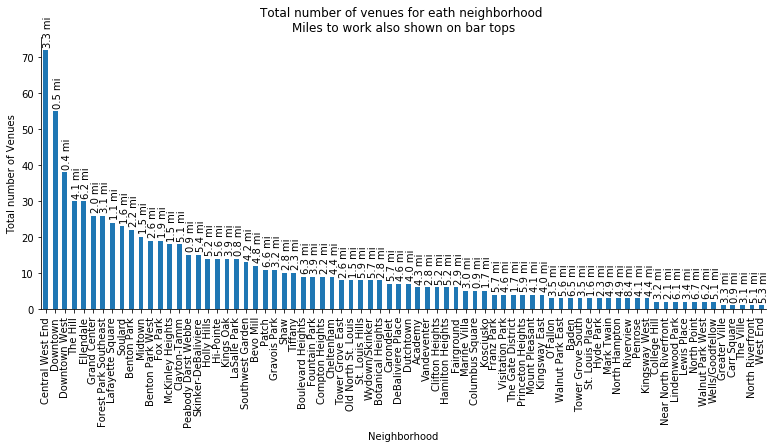

In [0]:
ax = st_louis_venue_numbers.plot.bar(x = 'Neighborhood', y = 'Venue Category', figsize=(13,5))

# Cleanup a bit
ax.set_ylabel('Total number of Venues')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()



for i, v in enumerate(st_louis_venue_numbers['Venue Category']):
    ax.text(i-0.25, v + 1, 
            str(round(st_louis_venue_numbers.miles_to_work[i],1)) + ' mi', 
            color='k',rotation = 90, verticalalignment = 'bottom')
ax.title.set_text('Total number of venues for eath neighborhood \nMiles to work also shown on bar tops')

According to the graph, it is clear that the top place for a lot of amenities is Central West End which is only 3.3 miles away. Then there is Downtown, Downtown West, etc. But the distance is not the only thing I am looking at.

Let's find out how many different catogiries of amanities we have.

In [0]:
print('There are {} uniques categories.'.format(len(st_louis_venues['Venue Category'].unique())))

There are 177 uniques categories.


177 different categories. Not bad... not bad at all.

### 2.5 Analyze Each Neighborhood to find how many unique catogories are belongs to each neighborhood


My goal is to find the best neighborhood that has so many unique amenities close by. I am planning to use the k-means algorithm. For that, I would like to create another data frame that has all our neighborhoods in the first column and frequency of different categories of amenities in the next columns. So I should have columns equal to the number of different categories I found from the previous section + 1 (for the Neighborhood  name column). Let's creae a dummy data frame and then we will fill the fields with the mean.

In [0]:
# one hot encoding
st_louis_onehot = pd.get_dummies(st_louis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
st_louis_onehot['Neighborhood'] = st_louis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [st_louis_onehot.columns[-1]] + list(st_louis_onehot.columns[:-1])
st_louis_onehot = st_louis_onehot[fixed_columns]

st_louis_onehot.sample(n = 5)

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Line,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,...,Pool,Pub,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
45,Benton Park West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
410,The Gate District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,Clayton-Tamm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
625,Midtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
329,Ellendale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's fill the data frame with real data, aka the mean number of different categories of amenities. 

In [0]:
st_louis_grouped = st_louis_onehot.groupby('Neighborhood').mean().reset_index()
st_louis_grouped
st_louis_grouped.head()

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Line,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,...,Pool,Pub,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Academy,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Baden,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Benton Park,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,0.0,0.000000,0.0,0.090909,0.0,0.0,0.045455,0.045455,0.090909,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.045455,0.0,0.0,0.0
3,Benton Park West,0.0,0.0,0.000000,0.0,0.000000,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.052632,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Bevo Mill,0.0,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.083333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [0]:
# See how many rows and columns
st_louis_grouped.shape

(76, 178)

It turns out that different neighborhoods have different strength as the top comment venue for each neighborhood is different. For example, if you are a person who likes Music you might want to go to Belleair, but if you are someone you want to access to the gym every day, you might find Bunker Hill is better. Did I lose you for a moment? Ok, let me show what I mean. Let me show you what are the best 10 common venues near each neighborhood. See below. 

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =st_louis_grouped['Neighborhood']

for ind in np.arange(st_louis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(st_louis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy,Pharmacy,Chinese Restaurant,Convenience Store,Grocery Store,Video Store,Outdoors & Recreation,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
1,Baden,Food,Fast Food Restaurant,Bar,Yoga Studio,Food Truck,Filipino Restaurant,Festival,Farmers Market,Farm,Falafel Restaurant
2,Benton Park,Brewery,Dive Bar,Beer Garden,Bakery,New American Restaurant,Pizza Place,Cocktail Bar,Massage Studio,Sandwich Place,Café
3,Benton Park West,Mexican Restaurant,Pizza Place,Intersection,Bakery,Locksmith,Convenience Store,Art Gallery,Music Venue,Restaurant,Taco Place
4,Bevo Mill,Bar,Restaurant,Lounge,Mexican Restaurant,Arcade,Discount Store,Bed & Breakfast,German Restaurant,Food,Taco Place


I think by looking at the table above you might understand that different neighborhoods have different amenities strength. The best neighborhood depends on which kind of amenities are around you and what your choises are. 

With this, I am done with my data preperation and preliminary analysis of the data. Let's move on to real machine learning.

## 3. Methodology - K-means Clustering


For this study, I am going to use K-means clustering algorythm. Since we have unlabled data, I think this will be a very good starting point to do an unsupervised algorythm. However, I am not 100 % sure how many clusters to choose. We will do some calculations to find the best number of clusters

### 3.1 Choosing the best cluster number using elbow method
Let's start from K = 1 and go up to K = 10. To find the best K value, I am going to compa1re the resulted inertia or within-cluster sum-of-squares value.

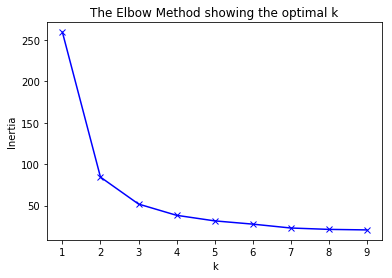

In [0]:
# set number of clusters
maxK = 10
st_louis_grouped_clustering = st_louis_grouped.drop('Neighborhood', 1)
st_louis_grouped_clustering['miles_to_work'] = st_louis_df.miles_to_work
inertia = []

for k in range(1,maxK):
  # run k-means clustering
  kmeans = KMeans(n_clusters=k,random_state = 0).fit(st_louis_grouped_clustering)

  #istortion.append(sum(np.min(cdist(st_louis_grouped_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1)) / st_louis_grouped_clustering.shape[0])
  inertia.append(kmeans.inertia_)
  

#print(distortion)

plt.plot(np.arange(1,maxK),inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


As the number of clusters increases, the centroids becomes closer to their clusters. This makes the distortion decrease as you increase K. You will get he minimum distortion when the number of clusters is exactly equal to the number of data points, so the distortion becomes zero. But notice the graph has a sudden variation of the slope at k = 4. Therefore, according to the Elbow method, we will consider this point as the best number of clusters as beyond this point the improvement of distortion is minimal.

### Reanalize data with best K
Let's rerun the K-mean method with k = 3. According to the graph, one can argue that k = 2, is more accurate. However, since the Distortion change is significant from k = 2 to k = 3, I choose k = 3.

In [0]:
  kclusters = 3
  
  # run k-means clustering
  kmeans = KMeans(n_clusters=kclusters,random_state = 0).fit(st_louis_grouped_clustering)

  kmeans.labels_

array([0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

We found the labels for each cluster. Notice that labels are nicely randomly distributed. This is actually a good sign that K-means is working well for this problem. This can be further confirmed by plotting all data points in the map. Just wait for it.

In [0]:
# add clustering labels to the data frame

try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)  
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) 

st_louis_merged = st_louis_df
st_louis_merged.head()
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
st_louis_merged = st_louis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

st_louis_merged.head() # check the last columns!

# Drop the rows with no cluster labels
st_louis_merged.dropna(inplace=True)

st_louis_merged.sample(n = 5)

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor,Latitude,Longitude,Address,miles_to_work,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,Wells/Goodfellow,5859,0.7,97.5,0.6,0.2,0.2,1.4,North,38.676282,-90.268553,"Wells Goodfellow, Saint Louis, City of Saint L...",5.054154,1.0,Country Dance Club,Scenic Lookout,Event Service,Food,Filipino Restaurant,Festival,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
47,Midtown,5652,61.9,25.8,2.8,0.2,9.2,2.0,Central,38.632681,-90.226410,"Midtown, Saint Louis, City of Saint Louis, Mis...",1.512895,1.0,Sandwich Place,Ice Cream Shop,Business Service,Rock Club,Brewery,Food Truck,Southern / Soul Food Restaurant,Japanese Restaurant,Bar,Sushi Restaurant
73,Walnut Park West,3349,1.1,97.9,0.8,0.0,0.0,0.8,North,38.704912,-90.257703,"Walnut Park West, Saint Louis, City of Saint L...",6.230633,1.0,Wings Joint,Lounge,Yoga Studio,Electronics Store,Filipino Restaurant,Festival,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
67,Tower Grove East,5853,45.9,43.9,4.9,0.3,5.3,2.7,South,38.603842,-90.236270,"Tower Grove East, Saint Louis, City of Saint L...",2.555955,2.0,Locksmith,Thrift / Vintage Store,Bar,Bakery,BBQ Joint,Intersection,Pub,Hot Dog Joint,Dive Bar,Event Space
37,Kingsway West,3441,3.4,94.5,0.8,0.5,0.0,1.4,North,38.670483,-90.259984,"Kingsway West, Saint Louis, City of Saint Loui...",4.442252,0.0,Pizza Place,Wine Bar,Bar,Electronics Store,Filipino Restaurant,Festival,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### 3.3 Creating an interactive map to show the neigborhoods and their cluster numbers

In [0]:
# create map

map_clusters = folium.Map(location=[lat0, lon0], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# St. Louis_merged

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster, miles in zip(st_louis_merged['Latitude'], st_louis_merged['Longitude'], st_louis_merged['Neighborhood'], st_louis_merged['Cluster Labels'].astype('int'),st_louis_merged['miles_to_work']):
    label = folium.Popup(str(poi)  + ' Cluster ' + str(cluster) + " " +  str(round(miles,2)) + " miles", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# Plot the location of the work place
folium.Marker(
        [lat0, lon0],
        popup = 'Work Place',
        icon=folium.Icon(color='purple')
        ).add_to(map_clusters)

# Show the map
map_clusters

## 4. Results
The original problem was to find the best neighborhood to have less commute time and easy access to close by venues. From a Wikipedia page, we found that there are 79 neighborhoods around St. Louis, Illinois. The initial analyses of the data suggested that there are 3 main regions of St. Louis and different ethnic groups dominated in different areas. North populated with black and the south is mainly occupied by white. It is not unusual to see that the central region is roughly populated by both groups. Other ethnic groups are scattered across all areas.

When I try to find the locations of the neighborhoods using geolocator app, it gave me no results for two neighborhoods. I could have obtained the locations for those two neighborhoods manually. Since it is just less than 3 % of the total data, I decided that not to put time on that. On the other hand, I like to use this learning algorithm for other towns. Therefore, it might be wise to stick to programmable solutions.

Then I obtained the amenities around each neighborhood. I found that the total number of amenities around each neighborhood ranges from 1 to ~70. According to the plot I created, the Central West End neighborhood has the best amenities around it with only 3.3 miles away from the workplace. There were a total of 811 venues covering 177 unique categories.

Then I found the frequency of each venue type belongs to each neighborhood created a new data frame. After adding the miles to work data column to this data frame, I used to use this as the input for the K-means algorithm.

I decided to use the K-means algorithm because of it very simple and fast for finding similar features in unlabeled data. I search through different values of Ks. Using the elbow method, I found that K = 3 would give us the optimum results. All 77 neighborhoods were divided into 3 categories by K-means.

### 4.1 Average cluster results
Let's investigate these three categories in more details by averaging different numbers of data.

In [0]:
df_groups = pd.merge(st_louis_venue_numbers,st_louis_merged[['Neighborhood','Population','White','Black','Cluster Labels']],on = 'Neighborhood', how = 'left')
#df_groups.reset_index()
print(df_groups.shape)
df_groups2 = df_groups.groupby('Cluster Labels').mean()
df_groups2.head()

(76, 7)


,Venue Category,miles_to_work,Population,White,Black
Cluster Labels,,,,,
0.0,10.296296,3.495589,4076.481481,27.970370,64.496296
1.0,10.076923,4.788743,4542.884615,55.926923,37.973077
2.0,11.782609,2.851308,3371.565217,33.813043,60.439130


Notice that, I did not give the demographic data as input. The reason I didn't do it because original data suggested that different ethnic groups are already concentrated into some parts of the town, north -black, south -white, center -mixed. But it very interesting to notice that both K group 0 and 3 are black-dominated, K Group 1 is black and white roughly equally distributed. Notice that K groups are nicely scattered around the map. If any, one can expect that all ethnics should have mixed numbers. Yet, different K-clustering have their own identical demographic variations, which is definitely unexpected and very interesting. In terms of the miles to work, K group 2 have an edge. On the other hand, the total number of venues are about the same for all three categories. **According to these results, my personal choice is a K - 2 group due to the closer distance to work and more close by venues.**



### 4.2 Graphical representation of best Neighborhoods
Let's try to visualize this graphically

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


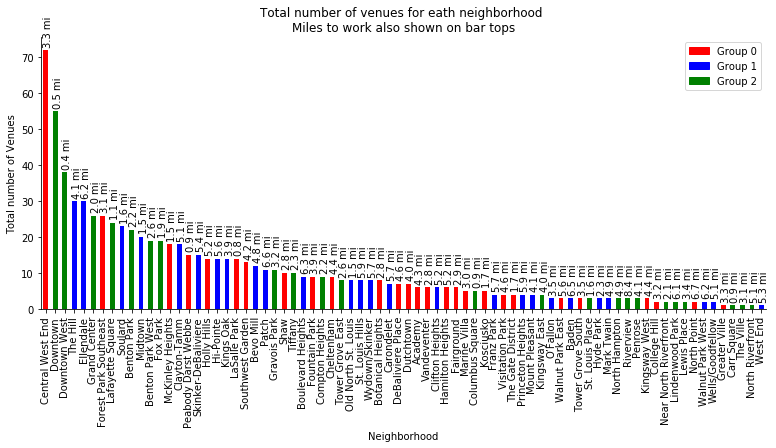

In [0]:


colors = df_groups['Cluster Labels'].transpose()

colors[colors == 0] = 'red'
colors[colors == 1] = 'blue'
colors[colors == 2] = 'green'

ax = df_groups.plot.bar(x = 'Neighborhood', y = 'Venue Category', figsize=(13,5)
      , color = colors)

# print(colors)
ax.set_ylabel('Total number of Venues')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.get_legend()



for i, v in enumerate(st_louis_venue_numbers['Venue Category']):
    ax.text(i-0.25, v + 1, 
            str(round(st_louis_venue_numbers.miles_to_work[i],1)) + ' mi', 
            color='k',rotation = 90, verticalalignment = 'bottom')
ax.title.set_text('Total number of venues for eath neighborhood \nMiles to work also shown on bar tops')

# Add legend manually
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Group 0')
blue_patch = mpatches.Patch(color='blue', label='Group 1')
green_patch = mpatches.Patch(color='green', label='Group 2')

lg = plt.legend(handles=[red_patch, blue_patch, green_patch])

Since I like group 2 and closer distance to work, I would choose Downtown as my top spot which has 50+ closeby venues and only half a mile away from the work. If I do not like it, then I go for Downtown West, Forest Park South East, etc. 

## 5.0 Discussion

The K-means algorithm was successfully able to suggest the best neighborhood to live around St. Louis. The best neighborhoods I choose are showing in green in the figure above. My choise of best neighborhood based on the number of close-by venues and closer distance to the workplace.

While demographic data were available for each neighborhood, I have not used those data in this study. However, one might consider that it a deciding factor and should be included in this study. There could be multiple other things I didn't consider. Some of those things could be access to a good public school, the ratings of the closest public school, distance to a bus station, a train station, or an airport, crime rates around the neighborhood, etc. If were to include those data, a more completed model can be developed.

Also, in the east of St. Louis there is the Illinois -Missouri border. The neighborhoods towards east which are close to St. Louis but not belongs to Missuiri are not included. I think these neighborhood can be included in the study.


# 6.0 Conclusion

Using publicly available data and K-mean machine learning algorithm, I was able to find several prospective neighborhoods. It is incredible that without visiting a faraway town, we can do a detailed analysis. 

I choose location data of venues nearby every neighborhood in St. Louis to figure out the best place to live. One of the requirements I have is to live close by to save some driving time.  However, there is a huge room to improve this algorithm by including additional data like school ratings, crime information, distance to public transportation, etc. Not only adding data but also eliminating redundant data is also important by investigating each features more carefully. 

All in all, I am very comfortable that this machine learning K-clustering was very successful at providing me the best neighborhood to live in a foreign city.



## 7.0 Acknowladgement
This project was not possible without instructors from IBM - Coursera, therefore I thank all the IBM instructors who teach the cources in Data Science Professional Certificate. I also thank free data providers, wikipedia and foursquare. This application was initlaly developed using IBM cloud and watson free account and later completed in Google Colab project. I thank both of these services.

# 8.0 References

1. Main data obtained from the site: 'https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis'

2. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011

3. Map data provider: https://foursquare.com/
